In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import imageio.v3 as imageio
sys.path.append(os.path.abspath("../src/"))
import spheres as calc_spheres
import maximum_inscribed_sphere as mis

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe

def colorbar(mappable, title=None, format=None, shift=None):
    if shift is not None:
        set_style(shift)
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax, format=format)
    plt.sca(last_axes)
    if title is not None:
        cbar.set_label(title)
    return cbar

In [4]:
vol_path = '/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pawel_workspace/projects/round_spher_LT/data/3D/mozzarella/20_1_1_s0_fat_mask.tif'

In [5]:
crop = 100
data = imageio.imread(vol_path)[:crop, :crop, :crop]
volumes, volume_labels, slice_labels = calc_spheres.prepare_data(data)

In [6]:
label_map = calc_spheres.create_label_map(volume_labels, slice_labels)

In [7]:
obj_dict_lists = []
roundness_values = []
centres = []
boundary_points = []
cluster_labels = []
spheres_in_vol = []
for i, (volume, label) in enumerate(zip(volumes, slice_labels)):
    roundness_value, obj_dict_list = calc_spheres.calc_2d_roundness(volume, label, return_obj=True)
    obj_dict_lists.append(obj_dict_list)
    roundness_values.append(roundness_value)
    tmp_centres, tmp_boundary_points = calc_spheres.get_centres_and_boundaries(roundness_values[i], label_map[i])
    centres.append(tmp_centres)
    boundary_points.append(tmp_boundary_points)
    spheres_in_vol.append(calc_spheres.calculate_all_spheres(centres[i], boundary_points[i]))
flat_spheres = calc_spheres.flatten_spheres(spheres_in_vol)
merged_spheres = calc_spheres.merge_duplicate_spheres(flat_spheres, centre_tolerance=1.5, radius_tolerance=0.5)

Slice number 0
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Slice number 1
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Slice number 2
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.


/work3/pwra/miniconda3/envs/DL_env2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work3/pwra/miniconda3/envs/DL_env2/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Slice number 3
Too few pixels (4) in region to provide a roundness.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Slice number 4
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Slice number 5
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Slice number 6
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Slice number 7
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Regi

/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-

Slice number 0
Region is on the border.
Region is on the border.
Region is on the border.
Slice number 1
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Slice number 2
Region is on the border.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Slice number 3
Region is on the border.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Slice number 4
Region is on the border.
Too few pixels (1) in region to provide a roundness.
Region is on the border.
Too few pixels (3) in region to provide a roundness.
Region is on the border.
Too few pixels (2) in region to provide a roundness.
Slice number 5
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Region is o

/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-

Slice number 0
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Too few pixels (2) in region to provide a roundness.
Too few pixels (1) in region to provide a roundness.
Region is on the border.
Slice number 1
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Region is on the border.
Slice number 2
Too few pixels (2) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is on the border.
Too few pixels (1) in region to provide a roundness.
Region is on the border.
Too few pixels (4) in region to provide a roundness.
Region is on the border.
Slice number 3
Too few pixels (2) in region to provide a roundness.
Region is on the border.
Region is on the border.
Region is 

/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/src/concentric_circles.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  r_s, Z_s = optimize.curve_fit(best_sphere,
/dtu-compute/3d-

In [8]:
maximum_inscribed_spheres = mis.calculate_maximum_inscribed_spheres(volumes[0], volume_labels[0], lower_bound=0)

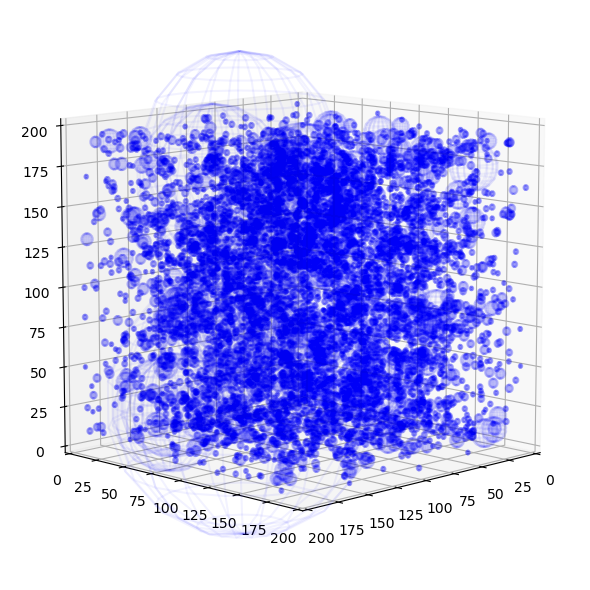

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')
ax.set_xlim(0, crop)
ax.set_ylim(0, crop)
ax.set_zlim(0, crop)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
for sphere in merged_spheres:
    x = sphere[3]*np.cos(u)*np.sin(v) + sphere[2]
    y = sphere[3]*np.sin(u)*np.sin(v) + sphere[1]
    z = sphere[3]*np.cos(v) + sphere[0]
    ax.plot_wireframe(x, y, z, color="blue", alpha=0.05)

ax.view_init(elev=10, azim=45, roll=0)
fig.tight_layout()
# fig.savefig('/dtu-compute/3d-imaging-center/projects/2022_DANFIX_31_EXCHEQUER/analysis/pwra_workspace/3d_roundness/notebooks/plots/spheres.png', dpi=200)

In [10]:
fat_labels = np.unique(merged_spheres[:, -1])
print(f'Number of fat blobs described {fat_labels.size}/{volume_labels[0].max()}')

Number of fat blobs described 1086/1966


In [11]:
for label in fat_labels:
    index = np.argwhere(merged_spheres[:, -1] == label)
    if np.mean(merged_spheres[index, 3]) > 2:
        print(label, np.mean(merged_spheres[index, 3]))

3.0 2.2641451208591774
4.0 2.4133100124636253
16.0 2.627464445494608
18.0 2.2245071806988372
36.0 3.050294763072492
37.0 3.543884006504184
44.0 2.36115126521887
45.0 3.067747941128162
67.0 2.5764571531353346
70.0 3.5709158460292274
75.0 2.6611513178282213
110.0 3.0055509602726658
117.0 2.813648371603824
120.0 2.3978043118791805
123.0 2.3349754673660286
126.0 2.654470918628768
140.0 2.01693655807756
145.0 2.368663225110225
147.0 3.4601526147901556
152.0 3.834410753096492
156.0 3.674182815664416
157.0 2.673948699955193
168.0 3.3027320728764265
171.0 2.2788466673432
181.0 2.3644215586009594
183.0 2.0546705745117793
185.0 2.460820888786789
188.0 2.0619194561097998
201.0 3.7476631929586555
202.0 2.2271166302959506
203.0 2.0120791592597365
206.0 2.7162413236542204
210.0 2.1437760983477014
237.0 2.2101268705097956
238.0 2.0521945674825113
247.0 2.4062743046738357
253.0 3.2622490425614905
256.0 3.184126150591773
262.0 2.27898981061168
265.0 2.199620791346459
274.0 3.1243161805689685
277.0 3.49

In [12]:
roundness_3D_dict = {}
roundness_3D = []
for label in fat_labels:
    if label in maximum_inscribed_spheres and (merged_spheres[:, -1] == label).any():
        index = np.argwhere(merged_spheres[:, -1] == label)
        mean_radii = np.mean(merged_spheres[index, 3])
        max_radii = maximum_inscribed_spheres[label]['radius']
        roundness_3D_dict[label] = {'blob_label': label,
                                    'mean_radii': mean_radii,
                                    'max_radii': max_radii,
                                    'roundness': mean_radii/max_radii,
                                   }
        roundness_3D.append([label, mean_radii, max_radii, mean_radii/max_radii])
        # output = f'Fat label: {label}, mean radii = {mean_radii:2.2f}, max radii = {max_radii:2.2f}, roundness = {(mean_radii/max_radii):2.2f}'
        # print(output)
roundness_3D = np.array(roundness_3D)

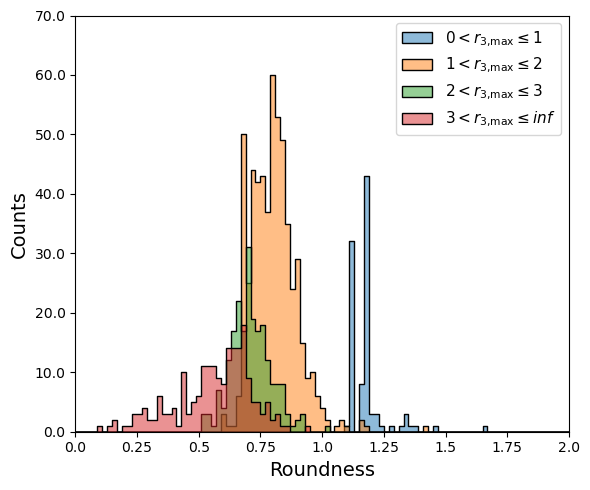

In [13]:
fig, ax = plt.subplots(1, 1, squeeze=False, figsize=(6, 5))
bin_width = 0.02
bin_min = 0
bin_max = 2
num_bins = int(((bin_max - bin_min) + bin_width)/bin_width)
for limit in [(0, 1), (1, 2), (2, 3), (3, np.inf)]:
    selected = np.logical_and(limit[0] < roundness_3D[:, 2], limit[1] >= roundness_3D[:, 2])
    tmp_roundness = roundness_3D[selected, -1]
    
    bin_count, bin_edges = np.histogram(tmp_roundness, bins=num_bins, range=(bin_min-bin_width/2, bin_max+bin_width/2))
    bin_centres = (bin_edges[1:] + bin_edges[:1])
    leg_name = f'${limit[0]} ' + '< r_{\\text{3,max}} \leq' + f' {limit[1]}$'
    hist = ax[0, 0].fill_between(bin_centres, bin_count, step='mid', label=leg_name)
    tmp_color = hist.get_facecolor()
    tmp_color[:, -1] = 0.5
    hist.set_facecolor(tmp_color)
    hist.set_edgecolor((0, 0, 0, 1))
ax[0, 0].set_xticks(ax[0, 0].get_xticks(), ax[0, 0].get_xticks(), fontsize=10)
ax[0, 0].set_yticks(ax[0, 0].get_yticks(), ax[0, 0].get_yticks(), fontsize=10)
ax[0, 0].set_xlim(bin_min, bin_max)
ax[0, 0].set_ylim(0, )
ax[0, 0].legend(fontsize=11)
ax[0, 0].set_xlabel('Roundness', fontsize=14)
ax[0, 0].set_ylabel('Counts', fontsize=14)
fig.tight_layout()

In [14]:
for label in fat_labels:
    if label in maximum_inscribed_spheres and (merged_spheres[:, -1] == label).any():
        index = np.argwhere(merged_spheres[:, -1] == label)
        mean_radii = np.mean(merged_spheres[index, 3])
        max_radii = maximum_inscribed_spheres[label]['radius']
        if mean_radii/max_radii > 1:
            output = f'Fat label: {label}, mean radii = {mean_radii:2.2f}, max radii = {max_radii:2.2f}, roundness = {(mean_radii/max_radii):2.2f}'
            print(output)

Fat label: 44.0, mean radii = 2.36, max radii = 2.00, roundness = 1.18
Fat label: 64.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 96.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 107.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 115.0, mean radii = 1.35, max radii = 1.00, roundness = 1.35
Fat label: 122.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 134.0, mean radii = 1.23, max radii = 1.00, roundness = 1.23
Fat label: 136.0, mean radii = 1.12, max radii = 1.00, roundness = 1.12
Fat label: 160.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 164.0, mean radii = 1.55, max radii = 1.41, roundness = 1.09
Fat label: 170.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 203.0, mean radii = 2.01, max radii = 2.00, roundness = 1.01
Fat label: 231.0, mean radii = 1.19, max radii = 1.00, roundness = 1.19
Fat label: 243.0, mean radii = 1.19, max radii = 1.00, roundness = 